# gyro-interp using nexsci data with single age reference

See `code_gyrointerp_nexsci.ipynb` for nexsci table with multiple age references.

In [1]:
import sys

# make sure you are using `gyrointerp` environment
assert sys.executable.split('/')[5]=='gyrointerp'

In [2]:
# Inside this jupyter lab, do not use `pip install xxx`, instead use:
# import sys
# !{sys.executable} -m pip install xxx

In [3]:
# check if package is installed
!{sys.executable} -m pip show gyrointerp

Name: gyrointerp
Version: 0.5
Summary: Gyrochronology via interpolation of open cluster rotation sequences.
Home-page: https://github.com/lgbouma/gyro-interp
Author: Luke Bouma
Author-email: bouma.luke@gmail.com
License: MIT
Location: /mnt_ut3/raid_ut3/home/jerome/github/research/project/ext_tools/gyro-interp
Editable project location: /mnt_ut3/raid_ut3/home/jerome/github/research/project/ext_tools/gyro-interp
Requires: astropy, matplotlib, numpy, pandas, scipy
Required-by: 


In [4]:
# import custom code from the `code` directory
import sys
sys.path.insert(0, '../code')

## load nexsci data

In [5]:
from kenmon import get_nexsci_data
import numpy as np

# set clobber=True to update data (takes > 5 mins)
df = get_nexsci_data(table_name='pscomppars', clobber=False)
df

Column definitions:  https://exoplanetarchive.ipac.caltech.edu/docs/API_PS_columns.html
Loaded:  ../data/nexsci_pscomppars.csv


,objectid,pl_name,pl_letter,hostid,hostname,hd_name,hip_name,tic_id,disc_pubdate,disc_year,...,pl_angseperr1,pl_angseperr2,pl_angseplim,pl_angsepformat,pl_angsepstr,pl_angsepsymerr,pl_angsep_reflink,pl_ndispec,sky_coord.ra,sky_coord.dec
0,3.34990,Kepler-24 e,e,2.424906,Kepler-24,NaN,NaN,TIC 122376177,2014-03,2014,...,NaN,NaN,0.0,NaN,0.1190,NaN,<a refstr=CALCULATED_VALUE href=/docs/pscp_cal...,0,290.413262,38.343728
1,3.24410,Kepler-1065 b,b,2.430631,Kepler-1065,NaN,NaN,TIC 378012771,2016-05,2016,...,NaN,NaN,0.0,NaN,0.0405,NaN,<a refstr=CALCULATED_VALUE href=/docs/pscp_cal...,0,294.511319,38.790465
2,3.12740,TOI-1260 c,c,2.572931,TOI-1260,NaN,NaN,TIC 355867695,2021-08,2021,...,NaN,NaN,0.0,NaN,0.8930,NaN,<a refstr=CALCULATED_VALUE href=/docs/pscp_cal...,0,157.144071,65.854199
3,3.13149,HD 28109 c,c,2.573080,HD 28109,HD 28109,NaN,TIC 29781292,2022-05,2022,...,NaN,NaN,0.0,NaN,2.2100,NaN,<a refstr=CALCULATED_VALUE href=/docs/pscp_cal...,0,65.238306,-68.102688
4,3.12788,K2-350 b,b,2.208571,K2-350,NaN,NaN,TIC 294319820,2021-08,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,204.035509,-14.009252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4355,3.11878,TRAPPIST-1 d,d,2.103803,TRAPPIST-1,NaN,NaN,TIC 278892590,2016-05,2016,...,NaN,NaN,0.0,NaN,1.7900,NaN,<a refstr=CALCULATED_VALUE href=/docs/pscp_cal...,0,346.626392,-5.043462
4356,3.10200,EPIC 201595106 b,b,2.797590,EPIC 201595106,NaN,NaN,TIC 397052808,2021-08,2021,...,NaN,NaN,0.0,NaN,0.0763,NaN,<a refstr=CALCULATED_VALUE href=/docs/pscp_cal...,0,183.720363,1.968169
4357,3.19930,Kepler-974 b,b,2.452484,Kepler-974,NaN,NaN,TIC 120418600,2016-05,2016,...,NaN,NaN,0.0,NaN,0.3120,NaN,<a refstr=CALCULATED_VALUE href=/docs/pscp_cal...,0,285.013108,40.220955
4358,3.20123,KOI-1843.03,c,2.452484,Kepler-974,NaN,NaN,TIC 120418600,2013-08,2013,...,NaN,NaN,0.0,NaN,0.0372,NaN,<a refstr=CALCULATED_VALUE href=/docs/pscp_cal...,0,285.013108,40.220955


In [6]:
df.hostname.unique().shape

(3305,)

In [7]:
name='V1298 Tau'
df.query("hostname==@name")[['st_rotp','st_teff']]

,st_rotp,st_teff
341,2.91,4941.0
771,2.91,4941.0
897,2.91,4941.0
2414,2.91,4941.0


In [8]:
# keep 1 planet row per hoststar
df = df.drop_duplicates(subset='hostname', keep='first')
df.shape

(3305, 684)

In [9]:
# how many stars have st_rotp?
df['st_rotp'].dropna().shape

(320,)

In [10]:
# how many stars have st_teff?
df['st_teff'].dropna().shape

(3303,)

In [11]:
cols = ['hostname', 
        'st_teff','st_tefferr1','st_tefferr2',
        'st_rotp','st_rotperr1','st_rotperr2', #there are many references without rotperr
        # 'st_teff_reflink', 'st_rotp_reflink'
       ]
df = df[cols].dropna()
df.shape

(292, 7)

In [12]:
# check if rotperr are symmetric
df[['st_rotperr1','st_rotperr2']].sum(axis=1).sum()

np.float64(10.118)

In [13]:
df.apply(lambda x: x.st_rotperr1+x.st_rotperr2, axis=1).sum()

np.float64(10.118)

In [14]:
# symmetric rotperr
df.apply(lambda x: x.st_rotperr1 if (x.st_rotperr1+x.st_rotperr2) == 0 else np.nan, axis=1).dropna().shape

(254,)

In [15]:
import numpy as np

# consistent rotperr within some rtol
df.apply(lambda x: x.st_rotperr1 if np.isclose(x.st_rotperr1, abs(x.st_rotperr2), rtol=0.1) > 0 else np.nan, axis=1).dropna().shape

(264,)

In [16]:
#ADOPTED: compute quadrature sum if err1 and err2 is asymmetric
df['st_rotperr'] = df.apply(lambda x: x.st_rotperr1 
                            if x.st_rotperr1+x.st_rotperr2==0 
                            else np.sqrt(x.st_rotperr1**2 + x.st_rotperr2**2), 
                            axis=1)

Text(0.5, 0, 'Rotation period err [d]')

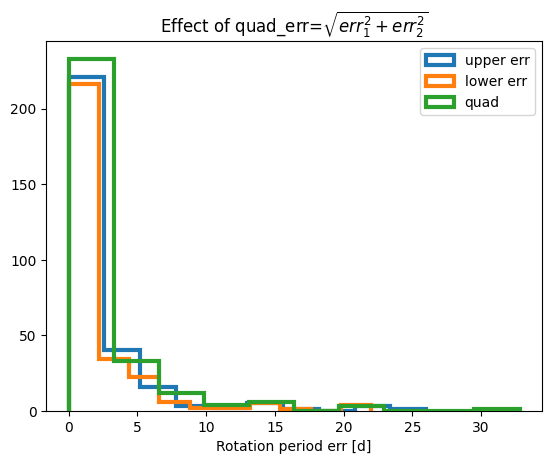

In [17]:
import matplotlib.pyplot as pl

# compare 
pl.hist(df.st_rotperr1, label='upper err', histtype='step', lw=3);
pl.hist(df.st_rotperr2.abs(), label='lower err', histtype='step', lw=3);
pl.hist(df.st_rotperr, zorder=3, label='quad', histtype='step', lw=3);
pl.title('Effect of quad_err=$\sqrt{err_1^2 + err_2^2}$')
pl.legend()
pl.xlabel('Rotation period err [d]')

In [18]:
# how much increase in err?
np.nanmedian(df.st_rotperr/df.st_rotperr1)-1

np.float64(0.0)

In [19]:
# symmetric tefferr
df.apply(lambda x: x.st_tefferr1 if (x.st_tefferr1+x.st_tefferr2) == 0 else np.nan, axis=1).dropna().shape

(234,)

In [20]:
# consistent rotperr within some rtol
df.apply(lambda x: x.st_tefferr1 if np.isclose(x.st_tefferr1, abs(x.st_tefferr2), rtol=0.1) > 0 else np.nan, axis=1).dropna().shape

(267,)

In [21]:
#ADOPTED: compute quadrature sum if err1 and err2 is asymmetric
df['st_tefferr'] = df.apply(lambda x: x.st_tefferr1 
                            if x.st_tefferr1+x.st_tefferr2==0 
                            else np.sqrt(x.st_tefferr1**2 + x.st_tefferr2**2), 
                            axis=1)

Text(0.5, 0, 'Teff err [K]')

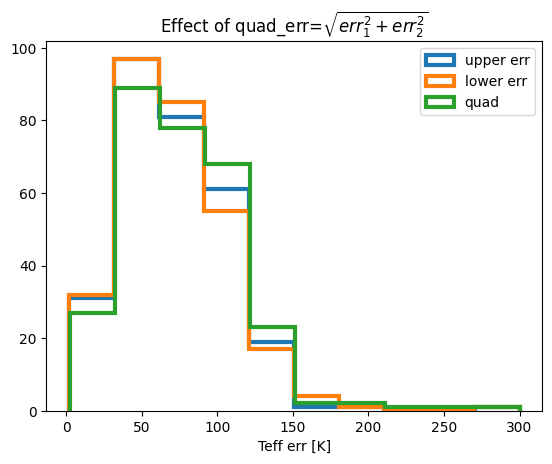

In [22]:
import matplotlib.pyplot as pl

# compare 
pl.hist(df.st_tefferr1, label='upper err', histtype='step', lw=3);
pl.hist(df.st_tefferr2.abs(), label='lower err', histtype='step', lw=3);
pl.hist(df.st_tefferr, zorder=3, label='quad', histtype='step', lw=3);
pl.title('Effect of quad_err=$\sqrt{err_1^2 + err_2^2}$')
pl.legend()
pl.xlabel('Teff err [K]')

In [23]:
np.median(df.st_tefferr/df.st_tefferr1)-1

np.float64(0.0)

## compare tables

This data was created in `code_gyrointerp_nexsci.ipynb`.

In [24]:
import pandas as pd

df2 = pd.read_csv('../data/nexsci_gyro_data.csv')
df2

,hostname,rotp,rotp_err,note rotp,teff,teff_err,note teff
0,Kepler-462,0.370,0.075,unique,7403.833333,7403.833333,ambiguous
1,Kepler-1115,0.580,NaN,unique,9115.250000,9115.250000,ambiguous
2,NGTS-33,0.670,0.000,unique,7072.000000,7072.000000,ambiguous
3,TOI-540,0.730,0.000,unique,3129.000000,3129.000000,ambiguous
4,MASCARA-1,0.850,0.020,unique,7645.666667,7645.666667,ambiguous
...,...,...,...,...,...,...,...
302,GJ 3929,122.000,13.000,unique,3368.333333,3368.333333,ambiguous
303,GJ 1132,122.305,122.305,ambiguous,3233.666667,3233.666667,ambiguous
304,GJ 1214,124.700,4.900,unique,3081.428571,3081.428571,ambiguous
305,LHS 1140,131.000,5.000,unique,3107.750000,3107.750000,ambiguous


In [25]:
cols = ['hostname', 
        'st_teff','st_tefferr1','st_tefferr2','st_teff',
        'st_rotp','st_rotperr1','st_rotperr2','st_rotperr'
       ]
df_merge = pd.merge(df, df2[df2['note rotp']=='unique'], on='hostname')
df_merge

,hostname,st_teff,st_tefferr1,st_tefferr2,st_rotp,st_rotperr1,st_rotperr2,st_rotperr,st_tefferr,rotp,rotp_err,note rotp,teff,teff_err,note teff
0,TOI-1260,4227.0,85.0,-85.0,30.63,3.81,-3.81,3.810000,85.000000,30.63,3.81,unique,4226.000000,4226.000000,ambiguous
1,K2-350,5789.0,46.0,-50.0,8.22,0.47,-0.47,0.470000,67.941151,8.22,0.47,unique,5794.000000,5794.000000,ambiguous
2,K2-332,3315.0,137.0,-152.0,31.71,3.60,-3.60,3.600000,204.628932,31.71,3.60,unique,3290.500000,3290.500000,ambiguous
3,TOI-1470,3709.0,11.0,-11.0,29.00,3.00,-3.00,3.000000,11.000000,29.00,3.00,unique,3666.500000,3666.500000,ambiguous
4,LTT 3780,3358.0,92.0,-92.0,104.00,15.00,-15.00,15.000000,92.000000,104.00,15.00,unique,3344.500000,3344.500000,ambiguous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Wolf 327,3542.0,70.0,-70.0,44.40,0.40,-0.40,0.400000,70.000000,44.40,0.40,unique,3504.000000,3504.000000,ambiguous
235,TOI-1634,3472.0,70.0,-70.0,77.00,26.00,-20.00,32.802439,70.000000,77.00,23.00,unique,3492.333333,3492.333333,ambiguous
236,TOI-1107,6311.0,98.0,-98.0,6.20,0.30,-0.30,0.300000,98.000000,6.20,0.30,unique,6406.000000,6406.000000,ambiguous
237,TRAPPIST-1,2566.0,26.0,-26.0,1.40,0.05,-0.05,0.050000,26.000000,1.40,0.05,unique,3195.000000,3195.000000,ambiguous


Text(0.5, 0, 'teff diff')

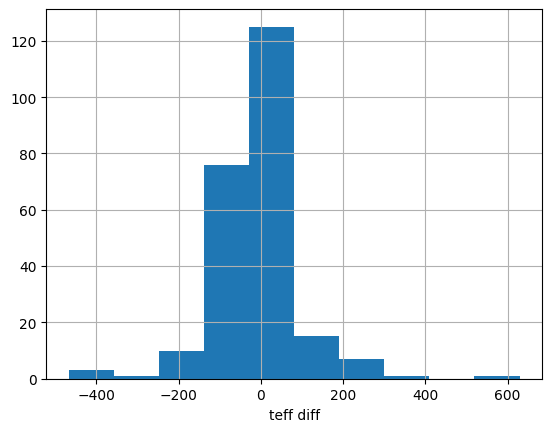

In [26]:
ax = df_merge[['st_teff','teff']].diff(axis=1)['teff'].hist()
ax.set_xlabel('teff diff')

Text(0.5, 0, 'rotp diff')

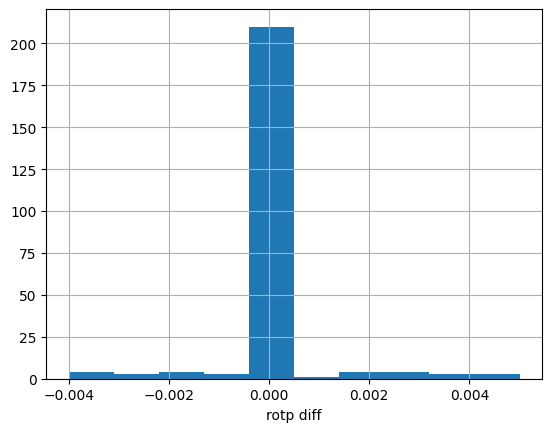

In [27]:
ax = df_merge[['st_rotp','rotp']].diff(axis=1)['rotp'].hist()
ax.set_xlabel('rotp diff')

## which table to adopt?

Let's use data from nexsci's `pscompars` table instead of vizier because we can track the `st_rotp` and `st_teff` references.

## filter data

Use only values of st_rotp and st_teff applicable for gyro-interp model

In [29]:
from kenmon import get_nexsci_data
import numpy as np

# set clobber=True to update data (takes > 5 mins)
df = get_nexsci_data(table_name='pscomppars', clobber=False)
df = df.drop_duplicates(subset='hostname', keep='first')
cols = ['hostname', 
        'st_teff','st_tefferr1','st_tefferr2',
        'st_rotp','st_rotperr1','st_rotperr2', 
       ]
df = df[cols].dropna()
df['st_rotperr'] = df.apply(lambda x: x.st_rotperr1 
                            if x.st_rotperr1+x.st_rotperr2==0 
                            else np.sqrt(x.st_rotperr1**2 + x.st_rotperr2**2), 
                            axis=1)
df['st_tefferr'] = df.apply(lambda x: x.st_tefferr1 
                            if x.st_tefferr1+x.st_tefferr2==0 
                            else np.sqrt(x.st_tefferr1**2 + x.st_tefferr2**2), 
                            axis=1)
df = df.reset_index(drop=True)
df.shape

Column definitions:  https://exoplanetarchive.ipac.caltech.edu/docs/API_PS_columns.html
Loaded:  ../data/nexsci_pscomppars.csv


(292, 9)

In [30]:
# we gyro model rotp limit
short_period = df.st_rotp<=15
# gyro-interp is only useful for FGK type stars
fgk_star = (df.st_teff>=3500) & (df.st_teff<6500)
# very small rotp_err is unrealistic
minimum_rotp_err = df.st_rotperr>0.03
# use only precise rotp values
precise_rotp = (df.st_rotperr/df.st_rotp)<0.1

# apply filter
df_final = df[short_period & fgk_star & precise_rotp & minimum_rotp_err]
df_final.shape #34 host stars

(69, 9)

In [31]:
# check values
hostname = 'XO-7'
d = df_final.query("hostname==@hostname").squeeze()
d

hostname         XO-7
st_teff        6250.0
st_tefferr1     100.0
st_tefferr2    -100.0
st_rotp          3.62
st_rotperr1      0.12
st_rotperr2     -0.12
st_rotperr       0.12
st_tefferr      100.0
Name: 49, dtype: object

It's OK that teff is ambiguous as long as rotp is unique.

## Run gyro-interp using filtered values

In [33]:
from gyrointerp import gyro_age_posterior_list, get_summary_statistics
import numpy as np

Teffs = df_final.st_teff
Teff_errs = df_final.st_tefferr
Prots = df_final.st_rotp
Prot_errs =df_final.st_rotperr
# Let's pass optional star IDs to name the posterior csv files.
star_ids = df_final.hostname

# The output posteriors will be cached at ~/.gyrointerp_cache/{cache_id}
cache_id = 'nexsci'

#typically, Prot<17 has age < 1 Gy 
# but let's extrend the grid and bounds_error as per `code_gyro_interp.ipynb`
age_grid = np.linspace(0, 5000, 500)

print(f"Running {len(star_ids)} targets...")

# This function will compute the posteriors, and cache them to CSV files
csvpaths = gyro_age_posterior_list(
    cache_id, 
    Prots, 
    Teffs, 
    Prot_errs=Prot_errs, 
    Teff_errs=Teff_errs,
    star_ids=star_ids, 
    age_grid=age_grid, 
    bounds_error="4gyrextrap",#"4gyrlimit",
    interp_method="pchip_m67"
)

[I 250329 13:30:20 gyro_posterior:751] Got N_tasks=69...
[I 250329 13:30:20 gyro_posterior:752] 2025-03-29T13:30:20.482245 beginning gyro_age_posterior_list


Running 69 targets...


[W 250329 13:30:21 gyro_posterior:355] WARNING: Teff uncertainties below 50 K are probably overly optimistic. Only do this if you have good reason to.
[W 250329 13:30:21 gyro_posterior:355] WARNING: Teff uncertainties below 50 K are probably overly optimistic. Only do this if you have good reason to.
[W 250329 13:30:21 gyro_posterior:355] WARNING: Teff uncertainties below 50 K are probably overly optimistic. Only do this if you have good reason to.
[W 250329 13:30:21 gyro_posterior:355] WARNING: Teff uncertainties below 50 K are probably overly optimistic. Only do this if you have good reason to.
[W 250329 13:30:21 gyro_posterior:355] WARNING: Teff uncertainties below 50 K are probably overly optimistic. Only do this if you have good reason to.
[W 250329 13:30:21 gyro_posterior:355] WARNING: Teff uncertainties below 50 K are probably overly optimistic. Only do this if you have good reason to.
[I 250329 13:30:21 gyro_posterior:518] Wrote /ut3/jerome/.gyrointerp_cache/nexsci/K2-290_Prot6

In [34]:
# import custom code from the `code` directory
import sys
sys.path.insert(0, '../code')

from kenmon import plot_age_posterior

In [143]:
from pathlib import Path

outdir = 'nexsci'
csvpaths = list(Path(f'/ut3/jerome/.gyrointerp_cache/{outdir}/').glob('*_posterior.csv'))
csvpaths[:3]

[PosixPath('/ut3/jerome/.gyrointerp_cache/nexsci/HD 63433_Prot6.4500_Teff5688.0_limitgrid_defaultparameters_posterior.csv'),
 PosixPath('/ut3/jerome/.gyrointerp_cache/nexsci/K2-101_Prot10.6000_Teff4927.0_limitgrid_defaultparameters_posterior.csv'),
 PosixPath('/ut3/jerome/.gyrointerp_cache/nexsci/TOI-1295_Prot11.0000_Teff6280.0_limitgrid_defaultparameters_posterior.csv')]

## read posteriors

In [112]:
from kenmon import plot_age_posterior
from gyrointerp import get_summary_statistics
import numpy as np
import pandas as pd
import traceback

outdir = 'nexsci'
# Read the posteriors and print their summary statistics.
results = {}
for csvpath in sorted(csvpaths):
    try:
        parts = csvpath.name.split('/')[-1].split('_')
        name = parts[0]
        Prot = float(parts[1][4:])
        Teff = float(parts[2][4:])
        # read data
        df = pd.read_csv(csvpath)
        age_grid = df.age_grid.values
        age_post = df.age_post.values
        r = get_summary_statistics(age_grid, age_post)
        if np.isfinite(r['median']):            
            results[name] = {'Prot': Prot,
                             'Teff': Teff,
                             'age_med': r['median'],
                             'age_lo': r['-1sigma'],
                             'age_hi': r['+1sigma']
            }
            if True:
                # plot
                xlim = (r['median']-r['-3sigma'], r['median']+r['+3sigma'])
                # msg = f"Age = {r['median']} +{r['+1sigma']} -{r['-1sigma']} Myr."
                # print(f"Teff {int(Teff)} Prot {Prot:.2f} {msg}")

                fig = plot_age_posterior(name, Prot, Teff, age_post, r, age_grid, xlim=xlim)
                # save plot
                fp = f'{outdir}/{name}_age_gyro.png'
                fig.savefig(fp, bbox_inches='tight')     
                plt.close(fig)
        results = pd.DataFrame(results)
    except Exception as e:
        print(name,e)
        print(traceback.format_exc())
        break

In [113]:
results.T.head()

,Prot,Teff,age_med,age_lo,age_hi
CoRoT-18,5.40,5440.0,201.19,104.99,117.39
CoRoT-6,6.40,6090.0,1163.29,428.57,642.75
DS Tuc A,2.85,5428.0,77.28,52.77,147.72
EPIC 211822797,14.60,4057.0,1179.63,510.55,475.60
HATS-18,9.80,5600.0,844.68,100.44,120.39


In [114]:
results.T.to_csv(f'{outdir}/{outdir}_gyro_results.csv')

## Exercise

* compare the age from gyro-interp with results from other methods

In [116]:
from kenmon import get_nexsci_data
import numpy as np

df = get_nexsci_data(table_name='pscomppars', clobber=False)
df = df.drop_duplicates(subset='hostname', keep='first')
cols = ['hostname', 
        'st_teff','st_tefferr1','st_tefferr2',
        'st_rotp','st_rotperr1','st_rotperr2',
       ]
cols2 = ['st_age', 'st_ageerr1', 'st_ageerr2', 'st_age_reflink']
df = df.dropna(subset=cols)[cols+cols2]
df['st_rotperr'] = df.apply(lambda x: x.st_rotperr1 
                            if x.st_rotperr1+x.st_rotperr2==0 
                            else np.sqrt(x.st_rotperr1**2 + x.st_rotperr2**2), 
                            axis=1)
df['st_tefferr'] = df.apply(lambda x: x.st_tefferr1 
                            if x.st_tefferr1+x.st_tefferr2==0 
                            else np.sqrt(x.st_tefferr1**2 + x.st_tefferr2**2), 
                            axis=1)
df = df.reset_index(drop=True)
df

Column definitions:  https://exoplanetarchive.ipac.caltech.edu/docs/API_PS_columns.html
Loaded:  ../data/nexsci_pscomppars.csv


,hostname,st_teff,st_tefferr1,st_tefferr2,st_rotp,st_rotperr1,st_rotperr2,st_age,st_ageerr1,st_ageerr2,st_age_reflink,st_rotperr,st_tefferr
0,TOI-1260,4227.0,85.00,-85.00,30.630,3.810,-3.810,6.70,5.10,-5.20,<a refstr=LAM_ET_AL__2022 href=https://ui.adsa...,3.810,85.000000
1,K2-350,5789.0,46.00,-50.00,8.220,0.470,-0.470,NaN,NaN,NaN,NaN,0.470,67.941151
2,K2-332,3315.0,137.00,-152.00,31.710,3.600,-3.600,NaN,NaN,NaN,NaN,3.600,204.628932
3,TOI-1470,3709.0,11.00,-11.00,29.000,3.000,-3.000,1.30,0.70,-0.70,<a refstr=GONZ_AACUTE_LEZ__AACUTE_LVAREZ_ET_AL...,3.000,11.000000
4,LTT 3780,3358.0,92.00,-92.00,104.000,15.000,-15.000,3.10,6.20,-0.98,<a refstr=BONFANTI_ET_AL__2024 href=https://ui...,15.000,92.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,HD 15337,5131.0,74.00,-74.00,36.528,0.022,-0.022,9.60,3.80,-3.90,<a refstr=ROS_AMP_AACUTE_RIO_ET_AL__2024 href=...,0.022,74.000000
288,TRAPPIST-1,2566.0,26.00,-26.00,1.400,0.050,-0.050,0.50,NaN,NaN,<a refstr=GILLON_ET_AL__2016 href=https://ui.a...,0.050,26.000000
289,WASP-19,5616.0,66.00,-65.00,10.500,0.200,-0.200,6.40,4.10,-3.50,<a refstr=CORT_EACUTE_S_ZULETA_ET_AL__2020 hre...,0.200,92.633687
290,EPIC 201595106,5679.0,60.00,-39.00,28.000,1.400,-1.400,6.00,2.60,-2.90,<a refstr=LIVINGSTON_ET_AL__2024 href=https://...,1.400,71.561163


In [117]:
outdir = 'nexsci'
gyro_age = pd.read_csv(f'{outdir}/{outdir}_gyro_results.csv', index_col=0)
gyro_age = gyro_age.reset_index(names='hostname')
gyro_age.shape

(55, 6)

In [118]:
# filter
df = df[df.hostname.isin(gyro_age.hostname)]
df.shape

(55, 13)

In [128]:
# make sure 
assert len(gyro_age[~gyro_age.hostname.isin(df.hostname)])==0

In [119]:
df.hostname.unique().shape

(55,)

In [120]:
gyro_age.head()

,hostname,Prot,Teff,age_med,age_lo,age_hi
0,CoRoT-18,5.40,5440.0,201.19,104.99,117.39
1,CoRoT-6,6.40,6090.0,1163.29,428.57,642.75
2,DS Tuc A,2.85,5428.0,77.28,52.77,147.72
3,EPIC 211822797,14.60,4057.0,1179.63,510.55,475.60
4,HATS-18,9.80,5600.0,844.68,100.44,120.39


In [121]:
df.query("hostname=='K2-100'")[cols]

,hostname,st_teff,st_tefferr1,st_tefferr2,st_rotp,st_rotperr1,st_rotperr2
235,K2-100,5945.0,110.0,-110.0,4.3,0.1,-0.1


In [122]:
df.shape

(55, 13)

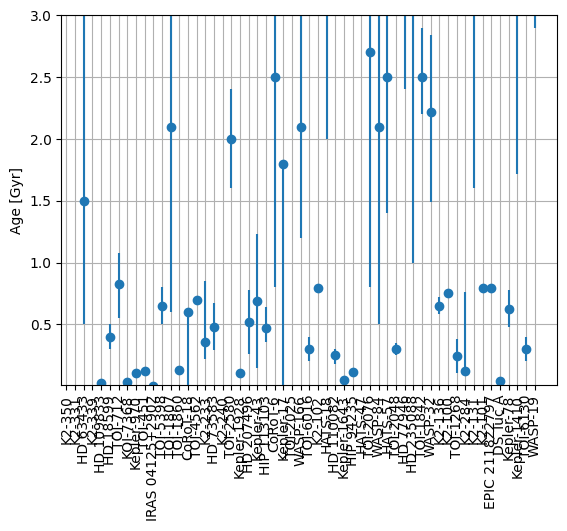

In [123]:
import matplotlib.pyplot as plt

x = df.hostname
y = df.st_age
yerr1 = abs(df.st_ageerr2)
yerr2 = df.st_ageerr1 
plt.errorbar(x, y, yerr=[yerr1, yerr2], marker='o', ls='')
plt.xticks(rotation=90);
# plt.yscale('log')
plt.ylabel('Age [Gyr]')
plt.ylim(0.01, 3)
plt.grid()

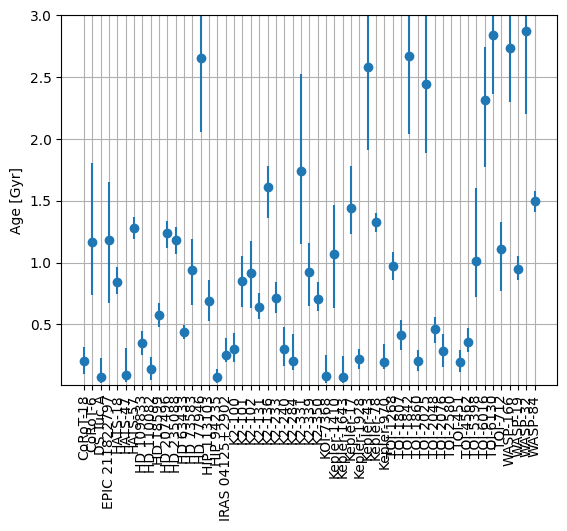

In [82]:
x = gyro_age.hostname
y = gyro_age.age_med/1e3
yerr1 = gyro_age.age_lo/1e3
yerr2 = gyro_age.age_hi/1e3
plt.errorbar(x, y, yerr=[yerr1, yerr2], marker='o', ls='')
plt.xticks(rotation=90);
plt.ylabel('Age [Gyr]')
plt.ylim(0.01, 3)
plt.grid()

## comparison

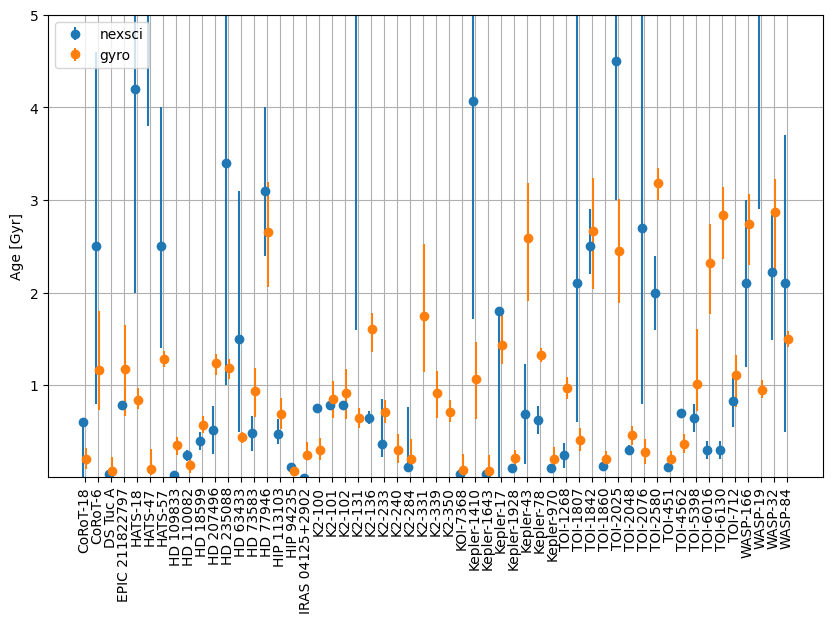

In [137]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))

# Combine hostnames and create x-axis positions
all_hostnames = np.unique(np.concatenate([df.hostname, gyro_age.hostname]))
x_pos = {name: i for i, name in enumerate(all_hostnames)}

# nexsci
x_vals_nexsci = np.array([x_pos[name] for name in df.hostname])
y = df.st_age
yerr1 = abs(df.st_ageerr2)
yerr2 = df.st_ageerr1
plt.errorbar(x_vals_nexsci - 0.1, y, yerr=[yerr1, yerr2], marker='o', ls='', label='nexsci')

# this work
x_vals_gyro = np.array([x_pos[name] for name in gyro_age.hostname])
y = gyro_age.age_med / 1e3
yerr1 = gyro_age.age_lo / 1e3
yerr2 = gyro_age.age_hi / 1e3
plt.errorbar(x_vals_gyro + 0.1, y, yerr=[yerr1, yerr2], marker='o', ls='', label='gyro')

# Adjust x-axis labels
plt.xticks(range(len(all_hostnames)), all_hostnames, rotation=90)
plt.ylabel('Age [Gyr]')
plt.ylim(0.01, 5)
plt.grid()
plt.legend()

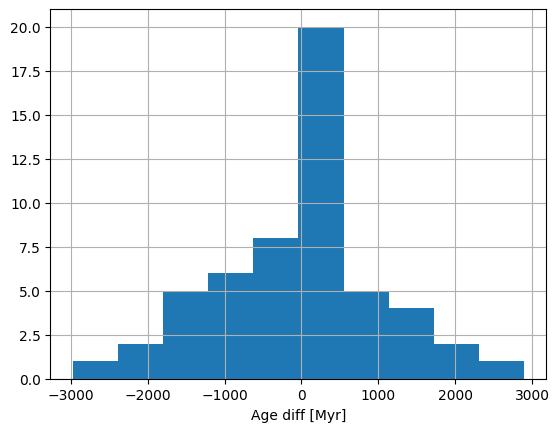

In [138]:
ax = pd.merge(df, gyro_age, on='hostname')[['st_age','age_med']].diff()['age_med'].hist()
ax.set_xlabel('Age diff [Myr]');

In [139]:
name = 'K2-100'
df.query("hostname==@name")[cols]

,hostname,st_teff,st_tefferr1,st_tefferr2,st_rotp,st_rotperr1,st_rotperr2
235,K2-100,5945.0,110.0,-110.0,4.3,0.1,-0.1


In [140]:
cols2 = ['hostname','age_med','age_lo','age_hi']
gyro_age.query("hostname==@name")[cols2]

,hostname,age_med,age_lo,age_hi
18,K2-100,298.71,102.59,131.42


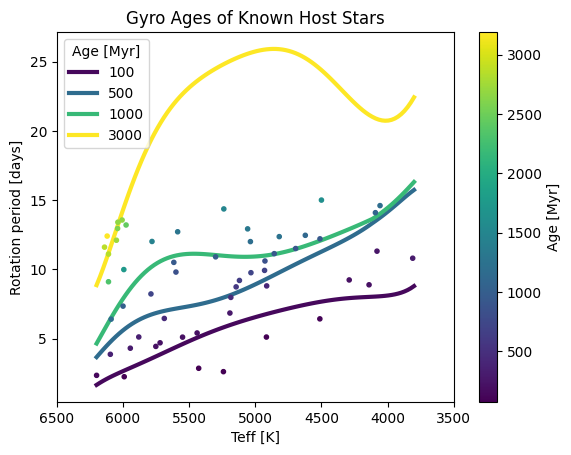

In [141]:
from gyrointerp.models import slow_sequence
from matplotlib.colors import ListedColormap
import numpy as np

tmin, tmax = gyro_age.age_med.min(), gyro_age.age_med.max()
Tmin, Tmax = 3800, 6200
slow_seq_ages = [round(tmin/100)*100,
                 500,
                 1000,
                 round(tmax/1000)*1000]
Nages = len(slow_seq_ages)
Teff = np.linspace(Tmin, Tmax, 100)
colors = ListedColormap(plt.cm.viridis(np.linspace(tmin/tmax, 1, Nages))).colors

fig, ax = plt.subplots()

for i,slow_seq_age in enumerate(slow_seq_ages):
    Prot = slow_sequence(
        Teff, slow_seq_age, poly_order=7,
        interp_method='pchip_m67'
    )
    ax.plot(
        Teff, Prot, color=colors[i], linewidth=3, zorder=-1, label=f"{slow_seq_age}"
    )

# this work
s = ax.scatter(gyro_age.Teff, gyro_age.Prot, marker='.', c=gyro_age.age_med)
# yerr = gyro_age.Prot_
# s = ax.errorbar(gyro_age.Teff, gyro_age.Prot, yerr=[yerrf], xerr=xerr, marker='.', c=gyro_age.age_med)
fig.colorbar(s, label='Age [Myr]')
ax.update({
    'xlabel': 'Teff [K]',
    'ylabel': 'Rotation period [days]',
    'title': 'Gyro Ages of Known Host Stars',
    'xlim': [3500, 6500],
    });
ax.xaxis.set_inverted(True)
ax.legend(title='Age [Myr]', loc='upper left')